# Test code and clearing up misunderstandings
i am very grateful to have been part of this internship program
I am ending stage B with a score of 65/100
I have a few thoughts i need clarified
* The test  questions order and choice of words was confusing in one major way when the coding questions reached, we were given particular parameters to develop a linear model with and asked question acording but towards the latter part of the test the wordingused was based on a multiple linear regression with idea that was the question ""**Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?**"" this completely put to question all the previous answers i had given,thus i saved my progress and paused the test hoping for clarification on the group there was completly no support or reasuurance frm any of the staff members

* I misunderstood the capabilities of your website, seeing that I could pause the test left some unanswered ,hoping to receive same day clarification on the subject matter above, although i had the answers in my  jupyter notebook, but  unfortunately the site does not truly pause the test indefinitely(looking back that seems kind of silly to think that) 

* oh well being data scientist is about trusting your instincts and being direct thanks for the previous outlines, they really helped in providing a clear path especially to actually know what to search for in topics I may have earlier felt i completed, the internship has been enlightining , thank you very much for the oppurtunity

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt #plotting
import matplotlib.gridspec as gridspec#plotting
import seaborn as sns #plotting
sns.despine() # to give the graphs a particular design
plt.rc('figure', figsize=(20,10)) #to make all my graphs the same size

<Figure size 432x288 with 0 Axes>

In [2]:
app_data = pd.read_csv('C:/Users/ADEKALU ADEBOLA/Downloads/energydata_complete.csv')
app_data.describe(include="all")

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-19 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [3]:
spr =(app_data.corr()["Appliances"].sort_values(ascending = False)[1:10])
print(spr)

lights       0.197278
T2           0.120073
T6           0.117638
T_out        0.099155
Windspeed    0.087122
RH_1         0.086031
T3           0.085060
T1           0.055447
T4           0.040281
Name: Appliances, dtype: float64


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
dfa= app_data[['T6','T2']]
p= pd.DataFrame(scaler.fit_transform(dfa), columns=dfa.columns)
X=p[['T2']]
y=p[['T6']]
X_train,X_testb,y_train,y_testb = train_test_split(X,y,test_size=0.3,random_state=42)

lR = LinearRegression().fit(X_train, y_train)

lR_pred= lR.predict(X_testb) # the predicted vriable

we were specifically asked to normalize the dataset in the data description, provide with the quiz

In [5]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_testb,lR_pred)
round(r2_score, 2)

0.64

In [6]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_testb,lR_pred))
round(rmse, 2)

0.11

In [7]:
import numpy as np
y_testc=np.array(y_testb)
predicted_valuesb= np.array(lR_pred)
rss = np.sum(np.square(y_testc-predicted_valuesb))
round(rss,2)

66.12

In [8]:
mse= mean_squared_error(y_testb,lR_pred)
round(mse, 2)

0.01

from this point onwards my confusion arose because of the wording "from the linear model above" which was clearly simple and weights world only be worth while for multiple

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
a= app_data.drop(columns=['date','lights'])
normalised_dfv = pd.DataFrame(scaler.fit_transform(a), columns=a.columns)
features_dfv = normalised_dfv.drop(columns=['Appliances'])
heating_target = normalised_dfv['Appliances']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_tests = train_test_split(features_dfv, heating_target,
test_size=0.3, random_state=42)
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_tests, predicted_values))
round(rmse, 3) 

0.088

In [10]:
linear_model.score(x_test,y_tests)

0.14890246319303535

In [11]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_tests, predicted_values)
round(r2_score, 2)

0.15

R^2 is the same as coefficient of determination

In [12]:
linear_model.score(x_test,y_tests)

0.14890246319303535

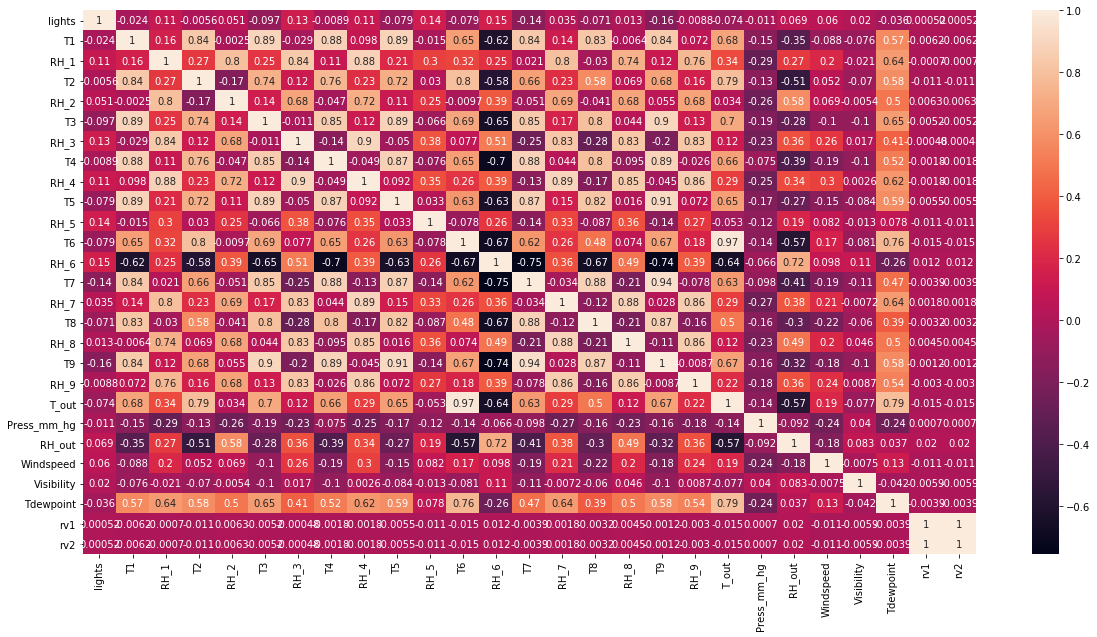

In [13]:
dfa=app_data.drop(["Appliances"],axis=1) #removing the target variable so observe
#the relationship between predictors
sns.heatmap(dfa.corr(),annot=True)

In [14]:
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

the lowest weights belong to T_out and RH_2

In [15]:
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [20]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
reg_p= ridge_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_tests, reg_p))
round(rmse, 3)

0.088

Ridge regression had no effect on the linear model rmse....

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [19]:
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


four values had non zero weights